In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.9.6
Using MPI version 3.1, 1 processes


In [2]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 100
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 + (-0.5 * sx), 0), 
                     size=mp.Vector3(0, sy)
                     )
          ]

-----------
Initializing structure...
time for choose_chunkdivision = 0.000437975 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 100
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 2.03467 s
-----------


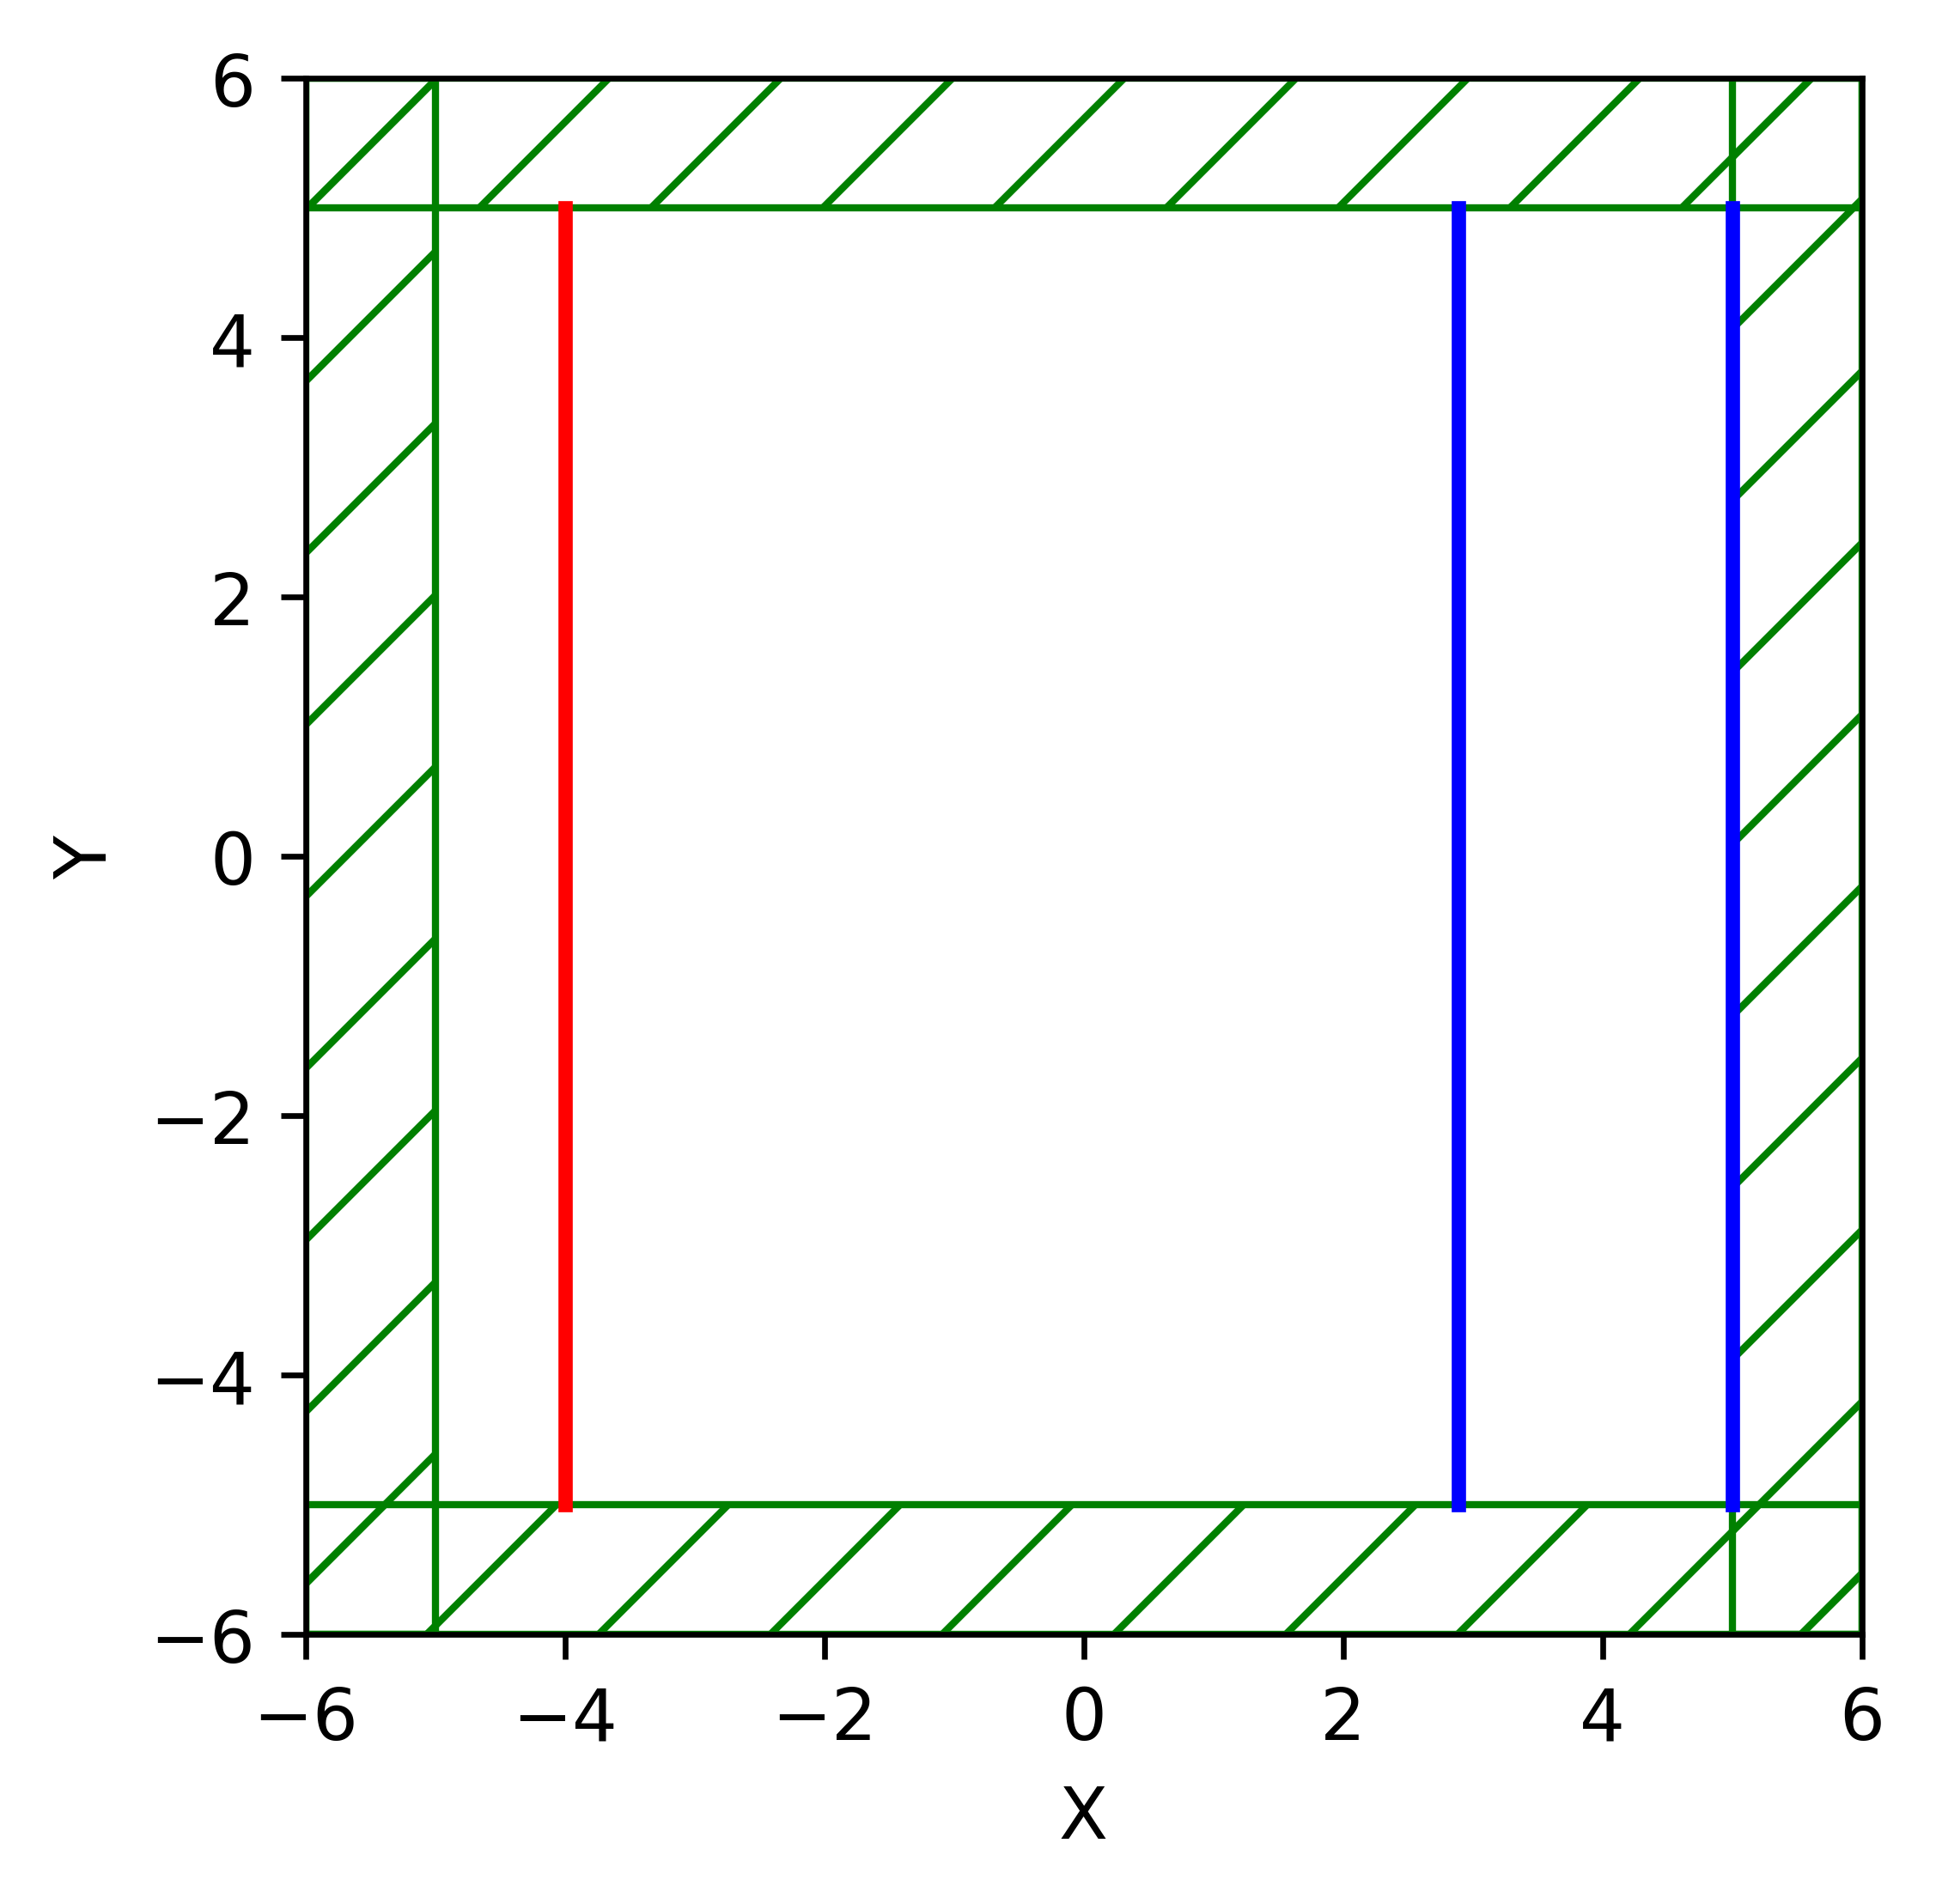

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

creating output file "./eps-000000000.h5"...
on time step 196 (time=0.98), 0.0204247 s/step
on time step 398 (time=1.99), 0.0198803 s/step
on time step 599 (time=2.995), 0.0199722 s/step
on time step 755 (time=3.775), 0.0259037 s/step
on time step 884 (time=4.42), 0.0311122 s/step
on time step 1070 (time=5.35), 0.0215802 s/step
on time step 1122 (time=5.61), 0.0769959 s/step
on time step 1301 (time=6.505), 0.0224119 s/step
on time step 1503 (time=7.515), 0.0198869 s/step
on time step 1705 (time=8.525), 0.0198811 s/step
on time step 1907 (time=9.535), 0.0198806 s/step
on time step 2108 (time=10.54), 0.019918 s/step
on time step 2308 (time=11.54), 0.0200585 s/step
on time step 2504 (time=12.52), 0.0204768 s/step
on time step 2700 (time=13.5), 0.0204991 s/step
on time step 2895 (time=14.475), 0.0205706 s/step
on time step 3091 (time=15.455), 0.0204767 s/step
on time step 3287 (time=16.435), 0.0204707 s/step
on time step 3482 (time=17.41), 0.0205137 s/step
on time step 3678 (time=18.39), 0

In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([8.75336484e-06, 9.13449461e-06, 9.53142393e-06, 9.94477018e-06,
       1.03751732e-05, 1.08232959e-05, 1.12898251e-05, 1.17754726e-05,
       1.22809754e-05, 1.28070968e-05, 1.33546275e-05, 1.39243860e-05,
       1.45172199e-05, 1.51340066e-05, 1.57756546e-05, 1.64431041e-05,
       1.71373282e-05, 1.78593338e-05, 1.86101629e-05, 1.93908933e-05,
       2.02026403e-05, 2.10465575e-05, 2.19238381e-05, 2.28357162e-05,
       2.37834680e-05, 2.47684129e-05, 2.57919153e-05, 2.68553853e-05,
       2.79602808e-05, 2.91081089e-05, 3.03004271e-05, 3.15388450e-05,
       3.28250256e-05, 3.41606874e-05, 3.55476057e-05, 3.69876143e-05,
       3.84826078e-05, 4.00345427e-05, 4.16454402e-05, 4.33173871e-05,
       4.50525383e-05, 4.68531187e-05, 4.87214250e-05, 5.06598285e-05,
       5.26707769e-05, 5.47567966e-05, 5.69204953e-05, 5.91645636e-05,
       6.14917783e-05, 6.39050038e-05, 6.64071959e-05, 6.90014036e-05,
       7.16907724e-05, 7.44785469e-05, 7.73680733e-05, 8.03628026e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.000584841 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 100
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.1,4.675,0)
          size (0.4,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.1,4.05,0)
          size (0.4,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.1,3.425,0)
          size (0.4,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.1,2.8,

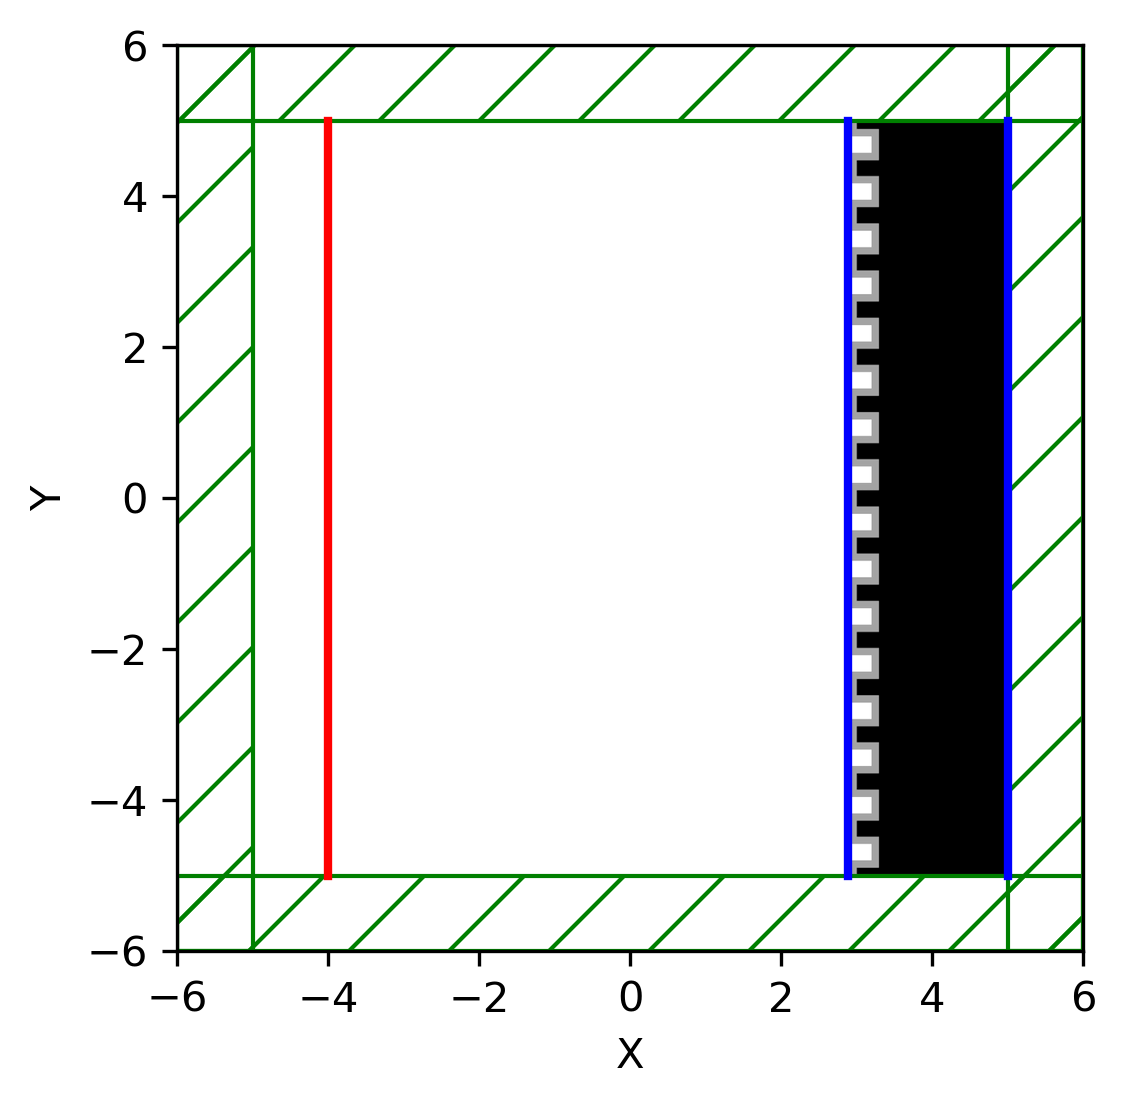

In [14]:
sim.reset_meep()

import math as mh


# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x, size_y, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*size_x, -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(T_Arc, size_y, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*T_Arc, -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            )
                            )

for i in np.arange(N+.5, -.5, -.5):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x, T_Arc, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*size_x, -0.5*sy+0.5*size_y+D*i), 
                            material = Si3N4,
                            )
                            )
        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000000.h5"...


/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1330: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1334: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 106 (time=0.53), 0.0377381 s/step
on time step 217 (time=1.085), 0.0361646 s/step
on time step 328 (time=1.64), 0.0362188 s/step
on time step 439 (time=2.195), 0.0362177 s/step
on time step 550 (time=2.75), 0.0362713 s/step
on time step 660 (time=3.3), 0.0365914 s/step
on time step 753 (time=3.765), 0.0432818 s/step
on time step 816 (time=4.08), 0.0640299 s/step
on time step 917 (time=4.585), 0.0399766 s/step
on time step 1016 (time=5.08), 0.0407411 s/step
on time step 1081 (time=5.405), 0.0616786 s/step
on time step 1139 (time=5.695), 0.0694546 s/step
on time step 1237 (time=6.185), 0.0408654 s/step
on time step 1345 (time=6.725), 0.0372073 s/step
on time step 1455 (time=7.275), 0.0364504 s/step
on time step 1565 (time=7.825), 0.036467 s/step
on time step 1675 (time=8.375), 0.036455 s/step
on time step 1785 (time=8.925), 0.0364866 s/step
on time step 1895 (time=9.475), 0.036424 s/step
on time step 2005 (time=10.025), 0.0364476 s/step
on time step 2115 (time=10.575), 0.036

on time step 17480 (time=87.4), 0.0363984 s/step
on time step 17591 (time=87.955), 0.0362189 s/step
on time step 17702 (time=88.51), 0.0361735 s/step
on time step 17813 (time=89.065), 0.0361134 s/step
on time step 17924 (time=89.62), 0.0360868 s/step
on time step 18035 (time=90.175), 0.0361493 s/step
on time step 18146 (time=90.73), 0.0361241 s/step
on time step 18257 (time=91.285), 0.0360857 s/step
on time step 18368 (time=91.84), 0.0361487 s/step
on time step 18479 (time=92.395), 0.0361124 s/step
on time step 18590 (time=92.95), 0.036224 s/step
on time step 18701 (time=93.505), 0.0360993 s/step
on time step 18812 (time=94.06), 0.0360881 s/step
on time step 18923 (time=94.615), 0.0360692 s/step
on time step 19034 (time=95.17), 0.0361255 s/step
on time step 19145 (time=95.725), 0.0361873 s/step
on time step 19256 (time=96.28), 0.0361108 s/step
on time step 19367 (time=96.835), 0.0361223 s/step
on time step 19478 (time=97.39), 0.036135 s/step
on time step 19589 (time=97.945), 0.0361511 

In [10]:
no_ARC_refl_data

FluxData(E=array([ 5.34897700e-07+1.78013079e-06j,  3.62979254e-07+1.87008776e-06j,
        1.78148914e-07+1.94377196e-06j, ...,
       -5.39487058e-07-1.26819813e-07j, -5.16558347e-07-1.75619752e-07j,
       -4.89375556e-07-2.21322970e-07j]), H=array([ 9.27998094e-05+0.000348j  ,  5.94802056e-05+0.00036381j,
        2.39127801e-05+0.0003765j , ..., -8.58753630e-04-0.0002297j ,
       -8.18429401e-04-0.00030623j, -7.71637719e-04-0.00037734j]))

In [11]:
no_ARC_refl_flux

[4.394161765650644e-06,
 4.58540316789352e-06,
 4.784581550100835e-06,
 4.992008045264149e-06,
 5.208005092241636e-06,
 5.432906789847322e-06,
 5.667059281178991e-06,
 5.910821168332495e-06,
 6.1645639442603295e-06,
 6.428672423840624e-06,
 6.703545163949965e-06,
 6.98959487769897e-06,
 7.287248860742377e-06,
 7.596949448754406e-06,
 7.919154513410828e-06,
 8.254337987049344e-06,
 8.602990395255526e-06,
 8.965619379783256e-06,
 9.342750209973655e-06,
 9.734926298863851e-06,
 1.014270974812458e-05,
 1.0566681937854212e-05,
 1.1007444157956751e-05,
 1.1465618260185147e-05,
 1.1941847306250554e-05,
 1.2436796200853646e-05,
 1.2951152320645294e-05,
 1.3485626165983236e-05,
 1.4040952060703016e-05,
 1.4617888906312021e-05,
 1.5217220973211932e-05,
 1.5839758699108823e-05,
 1.6486339472715876e-05,
 1.7157828404715958e-05,
 1.7855119111927218e-05,
 1.857913454813507e-05,
 1.9330827900185297e-05,
 2.0111183539929993e-05,
 2.0921218000277483e-05,
 2.176198094264763e-05,
 2.263455610515012e-05,


In [12]:
with_ARC_refl_flux

[-5.620373064386253e-07,
 -6.30846407839565e-07,
 -6.929180834363261e-07,
 -7.710934410834412e-07,
 -8.871258720649119e-07,
 -1.048747888919857e-06,
 -1.2431914142833264e-06,
 -1.441906500890851e-06,
 -1.6151118328424337e-06,
 -1.7486115887573815e-06,
 -1.8527907945523033e-06,
 -1.9569493278163197e-06,
 -2.0900682248221302e-06,
 -2.2576473699268658e-06,
 -2.428362464593583e-06,
 -2.540817718430916e-06,
 -2.5305217243251283e-06,
 -2.3653632288289923e-06,
 -2.070977945756698e-06,
 -1.7301489159820613e-06,
 -1.45247314043035e-06,
 -1.3262636012571284e-06,
 -1.375619404537459e-06,
 -1.545182449421024e-06,
 -1.7224707291689204e-06,
 -1.7887757169977656e-06,
 -1.6743452325245588e-06,
 -1.390507423112435e-06,
 -1.0227957240968584e-06,
 -6.89314784691284e-07,
 -4.86696206794468e-07,
 -4.5197516738891146e-07,
 -5.591034295585076e-07,
 -7.489474975160881e-07,
 -9.728409225810382e-07,
 -1.222936223967209e-06,
 -1.5317140295064226e-06,
 -1.9426043211595265e-06,
 -2.4719100244241034e-06,
 -3.087860

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
#import pandas as pd
#df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
#df.to_csv('with_ARC.csv')

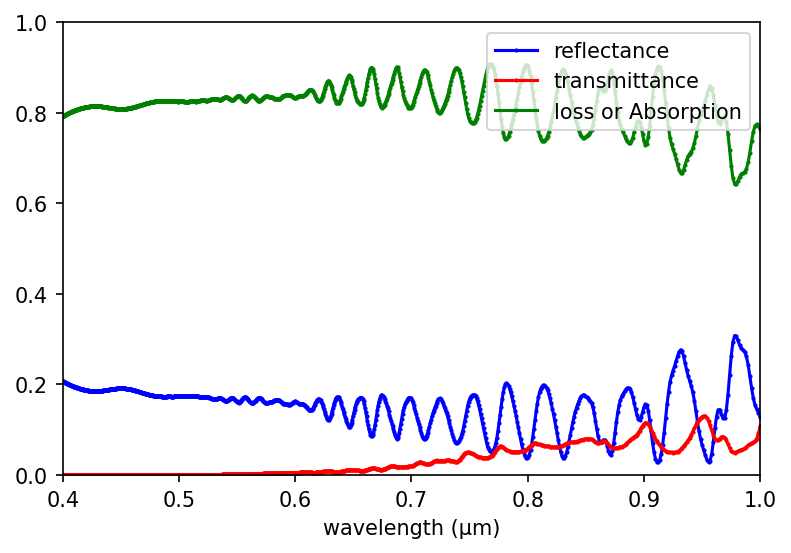

In [14]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()